In [32]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
(train_image,train_label),(test_image,test_label) = tf.keras.datasets.fashion_mnist.load_data()

In [34]:
train_image.shape

(60000, 28, 28)

In [7]:
train_label.shape

(60000,)

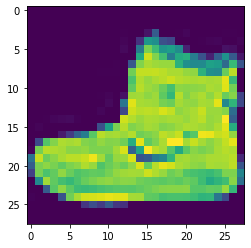

In [8]:
plt.imshow(train_image[0])

In [10]:
np.max(train_image[0])

255

In [12]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [35]:
train_image = train_image / 255
test_image = test_image / 255
#归一化

In [36]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28))) #使其扁平为28*28长的向量
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [37]:
model.compile(optimizer = 'adam',
loss = 'sparse_categorical_crossentropy',
metrics = ['acc'])#数字编码'sparse_categorical_crossentropy

In [38]:
model.fit(train_image,train_label,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5022 - acc: 0.8231
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3721 - acc: 0.8658
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3333 - acc: 0.8782
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3116 - acc: 0.8859
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2903 - acc: 0.8935


In [18]:
model.evaluate(test_image,test_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.3776 - acc: 0.8635


[0.377645343542099, 0.8634999990463257]

In [19]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [39]:
train_label_onehot = tf.keras.utils.to_categorical(train_label)

In [22]:
train_label_onehot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [40]:
test_label_onehot = tf.keras.utils.to_categorical(test_label)

In [41]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28))) #使其扁平为28*28长的向量
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [42]:
model.compile(optimizer = 'adam',
loss = 'categorical_crossentropy',
metrics = ['acc'])#独热编码'categorical_crossentropy

In [ ]:
model.fit(train_image,train_label_onehot,epochs=5)

In [ ]:
predict = model.predict(test_image)

In [46]:
predict

array([[3.5844229e-07, 1.7761955e-09, 3.0389412e-08, ..., 5.0297696e-03,
        1.6781293e-07, 9.9349642e-01],
       [2.3146681e-04, 9.3311805e-08, 9.6052247e-01, ..., 5.6753688e-14,
        7.8343263e-08, 1.5130897e-11],
       [2.0914936e-06, 9.9999607e-01, 1.3670923e-07, ..., 1.8012378e-15,
        1.4651987e-10, 2.0975044e-13],
       ...,
       [8.4767668e-03, 5.7091736e-08, 1.0075960e-03, ..., 1.6998149e-07,
        9.7396958e-01, 7.1830009e-08],
       [2.2282125e-06, 9.9981695e-01, 1.7434068e-08, ..., 1.7360163e-09,
        8.3122655e-09, 7.3660860e-09],
       [2.6860533e-05, 1.2683172e-06, 3.9232858e-05, ..., 9.7115226e-03,
        2.5614508e-04, 5.3749920e-04]], dtype=float32)

In [48]:
np.argmax(predict[0])

9

In [49]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28))) #使其扁平为28*28长的向量
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [50]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
loss = 'sparse_categorical_crossentropy',
metrics = ['acc'])

In [51]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [53]:
history = model.fit(train_image,train_label,epochs=10,validation_data=(test_image,test_label))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2221 - acc: 0.9163 - val_loss: 0.3398 - val_acc: 0.8880
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2151 - acc: 0.9167 - val_loss: 0.3521 - val_acc: 0.8798
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2066 - acc: 0.9208 - val_loss: 0.3511 - val_acc: 0.8828
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2006 - acc: 0.9241 - val_loss: 0.3559 - val_acc: 0.8856
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1931 - acc: 0.9255 - val_loss: 0.3530 - val_acc: 0.8897
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1864 - acc: 0.9298 - val_loss: 0.3566 - val_acc: 0.8831
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1801 - acc: 0.9311 - val_loss: 0.3556 - val_acc: 0.8897
Epoch 8/10
1875/1875 [==============================] - 4s 2ms

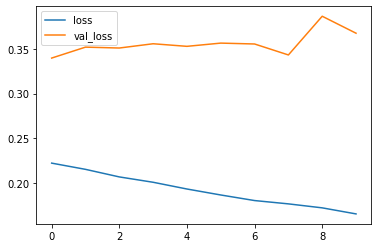

In [54]:
plt.plot(history.epoch,history.history.get('loss'),label = 'loss')
plt.plot(history.epoch,history.history.get('val_loss'),label = 'val_loss')
plt.legend()

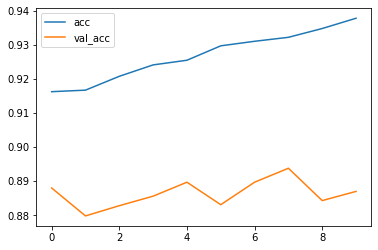

In [55]:
plt.plot(history.epoch,history.history.get('acc'),label = 'acc')
plt.plot(history.epoch,history.history.get('val_acc'),label = 'val_acc')
plt.legend()

In [59]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28))) #使其扁平为28*28长的向量
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [60]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
loss = 'sparse_categorical_crossentropy',
metrics = ['acc'])

In [61]:
history = model.fit(train_image,train_label,epochs=10,validation_data=(test_image,test_label))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7358 - acc: 0.7324 - val_loss: 0.4829 - val_acc: 0.8330
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5365 - acc: 0.8062 - val_loss: 0.4584 - val_acc: 0.8326
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4984 - acc: 0.8220 - val_loss: 0.4140 - val_acc: 0.8409
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4803 - acc: 0.8280 - val_loss: 0.4007 - val_acc: 0.8524
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4615 - acc: 0.8340 - val_loss: 0.4097 - val_acc: 0.8538
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4514 - acc: 0.8377 - val_loss: 0.4016 - val_acc: 0.8526
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4418 - acc: 0.8428 - val_loss: 0.3930 - val_acc: 0.8582
Epoch 8/10
1875/1875 [==============================] - 4s 2ms

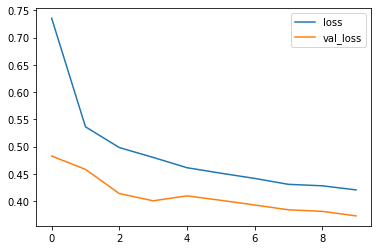

In [62]:
plt.plot(history.epoch,history.history.get('loss'),label = 'loss')
plt.plot(history.epoch,history.history.get('val_loss'),label = 'val_loss')
plt.legend()

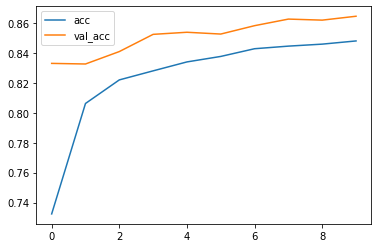

In [63]:
plt.plot(history.epoch,history.history.get('acc'),label = 'acc')
plt.plot(history.epoch,history.history.get('val_acc'),label = 'val_acc')
plt.legend()

In [64]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28))) #使其扁平为28*28长的向量
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [65]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
loss = 'sparse_categorical_crossentropy',
metrics = ['acc'])

In [66]:
history = model.fit(train_image,train_label,epochs=10,validation_data=(test_image,test_label))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5436 - acc: 0.8131 - val_loss: 0.4616 - val_acc: 0.8411
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4118 - acc: 0.8563 - val_loss: 0.4175 - val_acc: 0.8530
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3790 - acc: 0.8655 - val_loss: 0.3949 - val_acc: 0.8624
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3568 - acc: 0.8732 - val_loss: 0.4273 - val_acc: 0.8481
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3403 - acc: 0.8777 - val_loss: 0.3738 - val_acc: 0.8663
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3293 - acc: 0.8816 - val_loss: 0.3851 - val_acc: 0.8647
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3185 - acc: 0.8837 - val_loss: 0.3979 - val_acc: 0.8599
Epoch 8/10
1875/1875 [==============================] - 4s 2ms

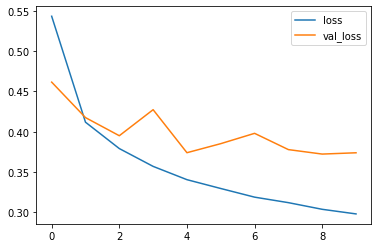

In [67]:
plt.plot(history.epoch,history.history.get('loss'),label = 'loss')
plt.plot(history.epoch,history.history.get('val_loss'),label = 'val_loss')
plt.legend()

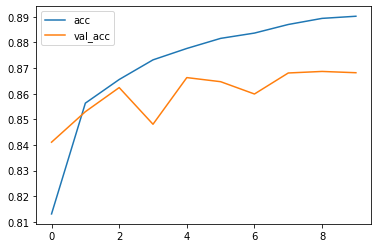

In [68]:
plt.plot(history.epoch,history.history.get('acc'),label = 'acc')
plt.plot(history.epoch,history.history.get('val_acc'),label = 'val_acc')
plt.legend()